In [ ]:
import pandas as pd
df=pd.read_csv('/content/Fraud_check.csv')
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,NO,Single,68833,50047,10,YES
1,YES,Divorced,33700,134075,18,YES
2,NO,Married,36925,160205,30,YES
3,YES,Single,50190,193264,15,YES
4,NO,Married,81002,27533,28,NO
...,...,...,...,...,...,...
595,YES,Divorced,76340,39492,7,YES
596,YES,Divorced,69967,55369,2,YES
597,NO,Divorced,47334,154058,0,YES
598,YES,Married,98592,180083,17,NO


In [ ]:
df.isnull().sum()

Undergrad          0
Marital.Status     0
Taxable.Income     0
City.Population    0
Work.Experience    0
Urban              0
dtype: int64

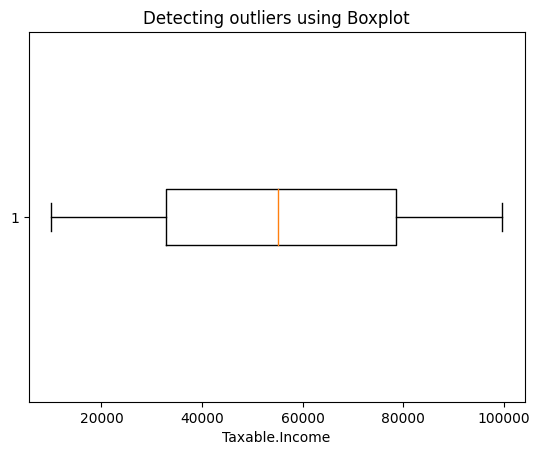

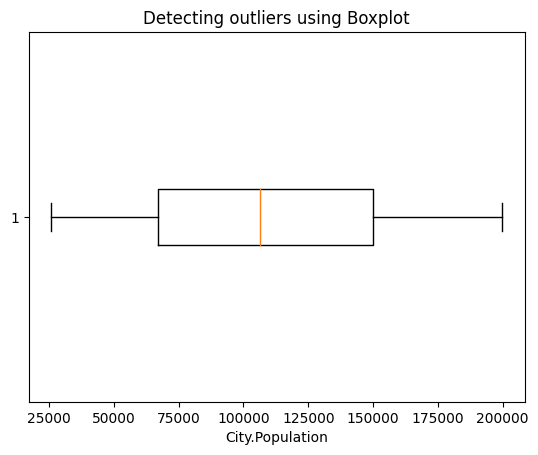

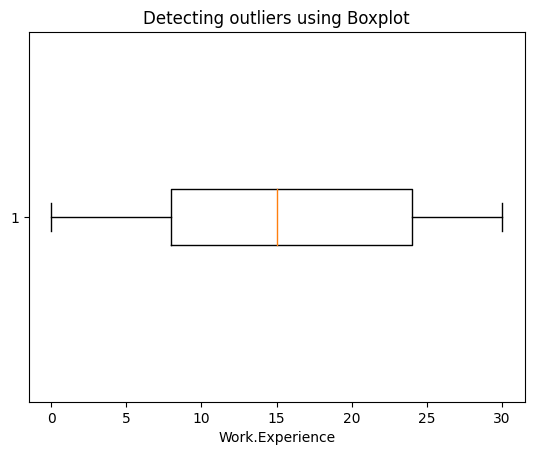

In [ ]:
import matplotlib.pyplot as plt
for i in dict(df.dtypes):
 if dict(df.dtypes)[i] == 'int64' or dict(df.dtypes)[i] ==  'float64':
  plt.boxplot(df[i], vert=False)
  plt.title("Detecting outliers using Boxplot")
  plt.xlabel(i)
  plt.show()

<ipython-input-28-15220c6ceedb>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


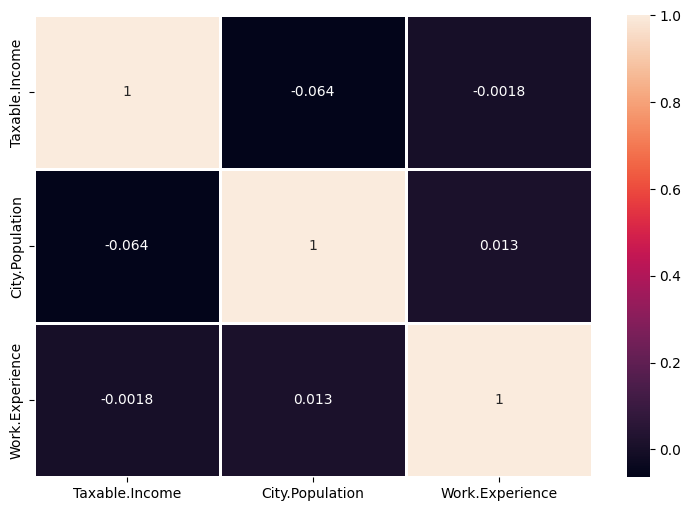

In [ ]:
#Feature selection
import seaborn as sns
plt.figure(figsize = (9, 6))
corr = df.corr()
sns.heatmap(data = corr, annot = True, fmt = '.2g', linewidth = 1)
plt.show()

In [ ]:
cond=df['Taxable.Income']>30000
cond1=df['Taxable.Income']<30000
df.loc[cond,'Taxable.Income']=1
df.loc[cond1,'Taxable.Income']=0
df['Taxable.Income'].nunique()


2

In [ ]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['Marital.Status']=le.fit_transform(df['Marital.Status'])
df['Undergrad']=le.fit_transform(df['Undergrad'])
df['Urban']=le.fit_transform(df['Urban'])
df

,Undergrad,Marital.Status,Taxable.Income,City.Population,Work.Experience,Urban
0,0,2,1,50047,10,1
1,1,0,1,134075,18,1
2,0,1,1,160205,30,1
3,1,2,1,193264,15,1
4,0,1,1,27533,28,0
...,...,...,...,...,...,...
595,1,0,1,39492,7,1
596,1,0,1,55369,2,1
597,0,0,1,154058,0,1
598,1,1,1,180083,17,0


In [ ]:
from sklearn.model_selection import train_test_split
x=df[['Undergrad','Marital.Status','City.Population','Work.Experience','Urban']]
y=df['Taxable.Income']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=25)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(480, 5)
(120, 5)
(480,)
(120,)


In [ ]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
y_pred=dtc.predict(x_test)
y_pred

array([1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 0, 1, 0, 1, 0, 1, 1])

In [ ]:
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report, accuracy_score, f1_score
model = DecisionTreeClassifier()
model = model.fit(x_train, y_train)
pred = model.predict(x_test)
print ('Accuracy:', accuracy_score(y_test, pred))
print ('\n clasification report:\n', classification_report(y_test, y_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

Accuracy: 0.7166666666666667

 clasification report:
               precision    recall  f1-score   support

           0       0.16      0.22      0.19        18
           1       0.85      0.79      0.82       102

    accuracy                           0.71       120
   macro avg       0.51      0.51      0.50       120
weighted avg       0.75      0.71      0.73       120


 confussion matrix:
 [[ 4 14]
 [21 81]]


In [ ]:
from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor(max_depth=3, random_state=0)
tree.fit(x_train, y_train)
y_pred = tree.predict(x_test)

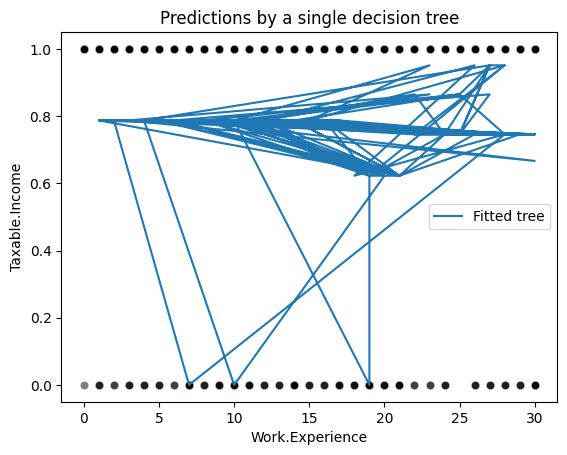

In [ ]:
sns.scatterplot(x=x_train['Work.Experience'], y=y_train, color="black", alpha=0.5)
plt.plot(x_test['Work.Experience'], y_pred, label="Fitted tree")
plt.legend()
_ = plt.title("Predictions by a single decision tree")

In [ ]:
# boostrap resampling
import numpy as np
# create a random number generator that will be used to set the randomness
rng = np.random.RandomState(1)
def bootstrap_sample(data, target):
    bootstrap_indices = rng.choice(np.arange(target.shape[0]),size=target.shape[0],replace=True,)
    data_bootstrap = data.iloc[bootstrap_indices]
    target_bootstrap = target.iloc[bootstrap_indices]
    return data_bootstrap, target_bootstrap

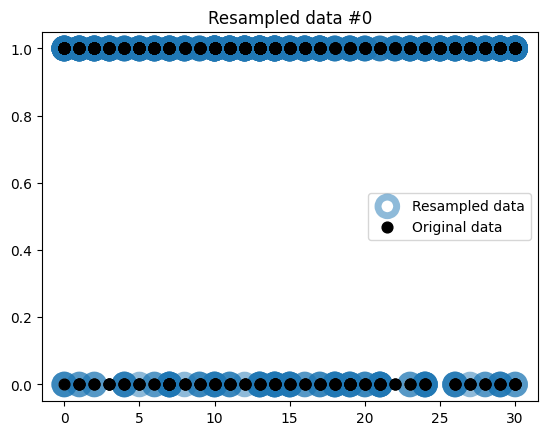

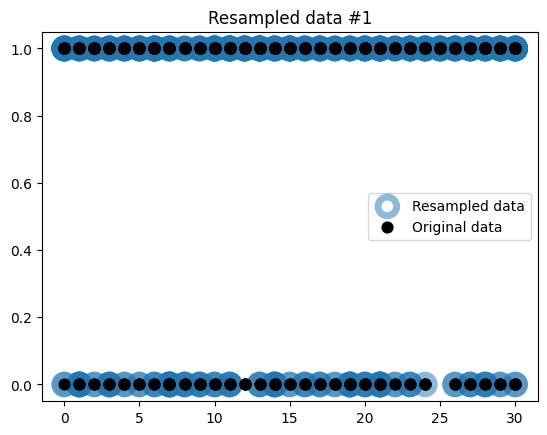

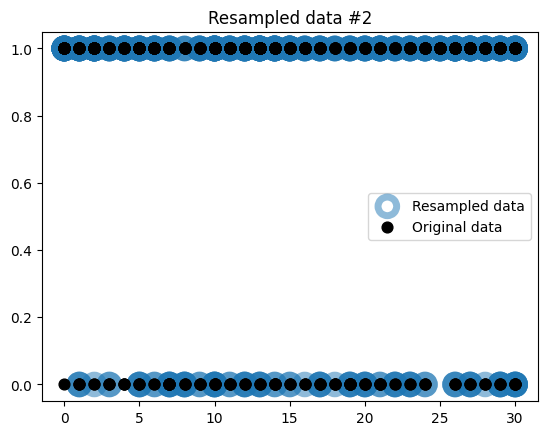

In [ ]:
n_bootstraps = 3
for bootstrap_idx in range(n_bootstraps):
    data_bootstrap, target_bootstrap = bootstrap_sample(x_train,y_train,)
    plt.figure()
    plt.scatter(data_bootstrap['Work.Experience'],target_bootstrap,color="tab:blue",facecolors="none",alpha=0.5,label="Resampled data",s=180,linewidth=5)
    plt.scatter(x_train['Work.Experience'], y_train,color="black",s=60,alpha=1,label="Original data",)
    plt.title(f"Resampled data #{bootstrap_idx}")
    plt.legend()

In [ ]:
bag_of_trees = []
for bootstrap_idx in range(n_bootstraps):
    tree = DecisionTreeRegressor(max_depth=3, random_state=0)
    data_bootstrap_sample, target_bootstrap_sample = bootstrap_sample( x_train, y_train)
    tree.fit(data_bootstrap_sample, target_bootstrap_sample)
    bag_of_trees.append(tree)

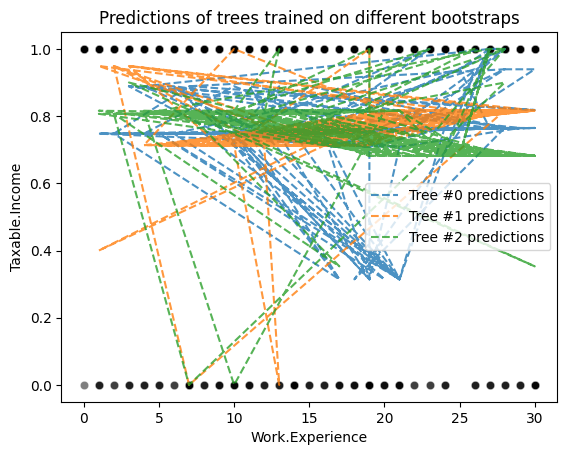

In [ ]:
sns.scatterplot(x=x_train['Work.Experience'], y=y_train, color="black", alpha=0.5)
for tree_idx, tree in enumerate(bag_of_trees):
    tree_predictions = tree.predict(x_test)
    plt.plot(x_test["Work.Experience"],tree_predictions,linestyle="--",alpha=0.8, label=f"Tree #{tree_idx} predictions",)
plt.legend()
_ = plt.title("Predictions of trees trained on different bootstraps")

In [1]:
print ('Accuracy:', accuracy_score(y_test, pred))
print ('\n clasification report:\n', classification_report(y_test, y_pred))
print ('\n confussion matrix:\n',confusion_matrix(y_test, y_pred))

NameError: ignored

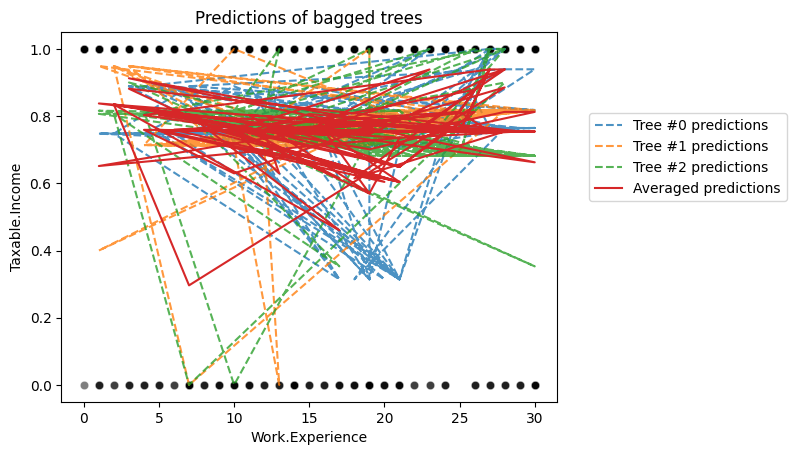

In [ ]:
sns.scatterplot( x=x_train['Work.Experience'], y=y_train, color="black", alpha=0.5)
bag_predictions = []
for tree_idx, tree in enumerate(bag_of_trees):
    tree_predictions = tree.predict(x_test)
    plt.plot(x_test["Work.Experience"], tree_predictions,linestyle="--",alpha=0.8,label=f"Tree #{tree_idx} predictions",)
    bag_predictions.append(tree_predictions)
bag_predictions = np.mean(bag_predictions, axis=0)
plt.plot(x_test["Work.Experience"], bag_predictions, label="Averaged predictions",linestyle="-",)
plt.legend(bbox_to_anchor=(1.05, 0.8), loc="upper left")
_ = plt.title("Predictions of bagged trees")

In [ ]:
# bagging model
from sklearn.ensemble import BaggingRegressor
bagged_trees = BaggingRegressor(estimator=DecisionTreeRegressor(max_depth=3), n_estimators=100,)
_ = bagged_trees.fit(x_train, y_train)

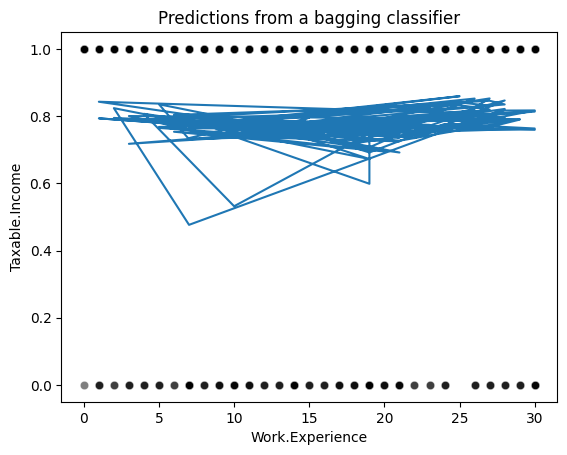

In [ ]:
sns.scatterplot(x=x_train['Work.Experience'], y=y_train, color="black", alpha=0.5)
bagged_trees_predictions = bagged_trees.predict(x_test)
plt.plot(x_test["Work.Experience"], bagged_trees_predictions)
_ = plt.title("Predictions from a bagging classifier")

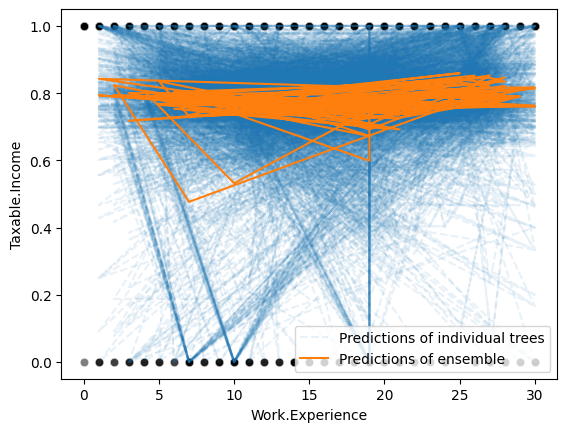

In [ ]:
for tree_idx, tree in enumerate(bagged_trees.estimators_):
    label = "Predictions of individual trees" if tree_idx == 0 else None
    tree_predictions = tree.predict(x_test.to_numpy())
    plt.plot(x_test['Work.Experience'],tree_predictions,linestyle="--",alpha=0.1,color="tab:blue",label=label,)
sns.scatterplot(x=x_train["Work.Experience"], y=y_train, color="black", alpha=0.5)
bagged_trees_predictions = bagged_trees.predict(x_test)
plt.plot(x_test["Work.Experience"],bagged_trees_predictions,color="tab:orange",label="Predictions of ensemble",)
_ = plt.legend()